Submitted By: Somya Saraswat(15MI409)
**Assignment 1: To Generate a sequence and to predict the next value of the sequence.** 
---
In this code I generated a series: **5,9,17,29,45,...** and trained the model to predict the next value of the series. Explaination of the series is as follows, The series is generated in a pattern that is sum of previous number and a multiple of 4. For example, X[0]=5, X[1]=5+4=9, X[3]=9+4*2=17 and so on.

In [0]:
import numpy as np

In [0]:
import keras

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense, Flatten
from keras.layers import SimpleRNN, LSTM

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
import matplotlib.pyplot as plt

In [0]:
#X= [[[(i*j+j)/500] for i in range(5)]for j in range (100)]
X= [[[(5+2*(i+j)*(i+j+1))] for i in range(5)]for j in range (100)]

In [0]:
Y= [(5+2*(i+5)*(i+6))for i in range (100)]

In [81]:
 for i in range(100):
    print(X[i],Y[i])

[[5], [9], [17], [29], [45]] 65
[[9], [17], [29], [45], [65]] 89
[[17], [29], [45], [65], [89]] 117
[[29], [45], [65], [89], [117]] 149
[[45], [65], [89], [117], [149]] 185
[[65], [89], [117], [149], [185]] 225
[[89], [117], [149], [185], [225]] 269
[[117], [149], [185], [225], [269]] 317
[[149], [185], [225], [269], [317]] 369
[[185], [225], [269], [317], [369]] 425
[[225], [269], [317], [369], [425]] 485
[[269], [317], [369], [425], [485]] 549
[[317], [369], [425], [485], [549]] 617
[[369], [425], [485], [549], [617]] 689
[[425], [485], [549], [617], [689]] 765
[[485], [549], [617], [689], [765]] 845
[[549], [617], [689], [765], [845]] 929
[[617], [689], [765], [845], [929]] 1017
[[689], [765], [845], [929], [1017]] 1109
[[765], [845], [929], [1017], [1109]] 1205
[[845], [929], [1017], [1109], [1205]] 1305
[[929], [1017], [1109], [1205], [1305]] 1409
[[1017], [1109], [1205], [1305], [1409]] 1517
[[1109], [1205], [1305], [1409], [1517]] 1629
[[1205], [1305], [1409], [1517], [1629]] 17

In [0]:
X=np.array(X, dtype='float32')
Y=np.array(Y,dtype='float32')

In [0]:
X/=500
Y/=500

In [84]:
X.shape

(100, 5, 1)

In [85]:
Y.shape

(100,)

In [86]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=5)
X_train.shape

(80, 5, 1)

In [0]:
X_train

In [88]:
Y_test.shape

(20,)

In [0]:
from keras.layers import SimpleRNN, LSTM
model = Sequential()
model.add(LSTM((2),input_shape=(5,1), return_sequences=True))
model.add(LSTM((3),input_shape=(5,1), return_sequences=True))
model.add(Flatten())
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',loss='mae', metrics=['acc'])

In [135]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 5, 2)              32        
_________________________________________________________________
lstm_18 (LSTM)               (None, 5, 3)              72        
_________________________________________________________________
flatten_9 (Flatten)          (None, 15)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 16        
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [136]:
hist= model.fit(X_train, Y_train, epochs=2000, batch_size=100, validation_data=(X_test, Y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/2000
80/80 [==============================] - 5s 60ms/step - loss: 16.3763 - acc: 0.0000e+00 - val_loss: 11.6855 - val_acc: 0.0000e+00
Epoch 2/2000
80/80 [==============================] - 0s 179us/step - loss: 16.3746 - acc: 0.0000e+00 - val_loss: 11.6838 - val_acc: 0.0000e+00
Epoch 3/2000
80/80 [==============================] - 0s 167us/step - loss: 16.3731 - acc: 0.0000e+00 - val_loss: 11.6818 - val_acc: 0.0000e+00
Epoch 4/2000
80/80 [==============================] - 0s 128us/step - loss: 16.3713 - acc: 0.0000e+00 - val_loss: 11.6797 - val_acc: 0.0000e+00
Epoch 5/2000
80/80 [==============================] - 0s 136us/step - loss: 16.3694 - acc: 0.0000e+00 - val_loss: 11.6775 - val_acc: 0.0000e+00
Epoch 6/2000
80/80 [==============================] - 0s 142us/step - loss: 16.3673 - acc: 0.0000e+00 - val_loss: 11.6753 - val_acc: 0.0000e+00
Epoch 7/2000
80/80 [==============================] - 0s 145us/step - loss: 16.3652 - acc: 0.

In [0]:
Y_predict= model.predict(X_test)

In [138]:
np.round(Y_predict*500)

array([[10197.],
       [ 2832.],
       [ 5281.],
       [ 2253.],
       [12622.],
       [ 1607.],
       [  463.],
       [ 1267.],
       [  969.],
       [ 3298.],
       [16086.],
       [ 3625.],
       [11378.],
       [ 4141.],
       [ 8569.],
       [ 3139.],
       [ 4504.],
       [ 7799.],
       [  580.],
       [11077.]], dtype=float32)

In [139]:
np.round(Y_test*500)

array([10229.,  2817.,  5309.,  2249., 12645.,  1629.,   485.,  1305.,
        1017.,  3285., 21017.,  3617., 11405.,  4145.,  8585.,  3125.,
        4517.,  7817.,   617., 11105.], dtype=float32)

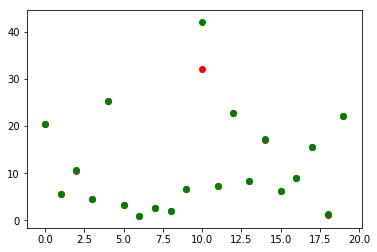

In [140]:
plt.scatter(range(20), Y_predict, c='r')
plt.scatter(range(20), Y_test, c='g')
plt.show()

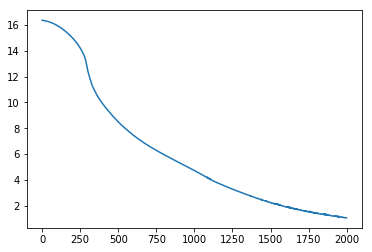

In [141]:
plt.plot(hist.history['loss'])
plt.show()